In [2]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data

In [3]:
diabetes_processed = pd.read_csv('processed_diabetes_binary.csv')

In [4]:
X = diabetes_processed['Diabetes_binary']
y = diabetes_processed.drop(columns=['Diabetes_binary'])
X_train, X_test, y_train, y_test = train_test_split(y, X, test_size=0.2, random_state=92)


# K-best feature

In [5]:
f1_score_list = []
# Dual set to false since instances > features
#lsvm = svm.LinearSVC(dual=False,C=1000000)
gbc = GradientBoostingClassifier()
# arbitrary k, we decide (now 21 features, aka all of them)
for k in range(1, 22):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train, y_train)

    selector_X_train = selector.transform(X_train)
    selector_X_test = selector.transform(X_test)

    # Fit on model
    gbc.fit(selector_X_train, y_train)
    kbest_predictions = gbc.predict(selector_X_test)

    f1_score_kbest = round(f1_score(y_test, kbest_predictions, average='weighted'), 3)
    f1_score_list.append(f1_score_kbest)


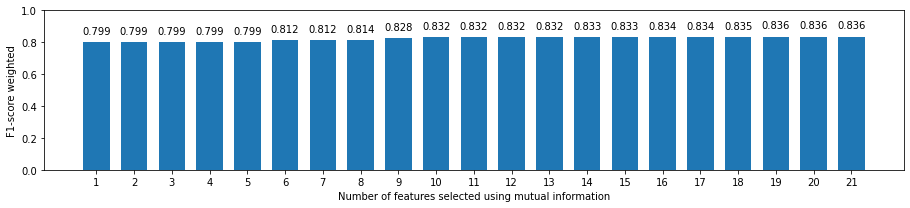

In [53]:
#fig, ax = plt.subplots()
plt.figure(figsize=(12.75,3))

x = np.arange(1,22)
y = f1_score_list

plt.bar(x,y, width=0.7)
plt.xlabel("Number of features selected using mutual information")
plt.ylabel("F1-score weighted")
plt.ylim(0, 1.0)
plt.xticks(np.arange(1,22))

for index, value in enumerate(y):
    plt.text(x=index+1, y=value+0.05, s=str(value), ha='center')

plt.tight_layout()

In [7]:
print(f1_score_list)

[0.799, 0.799, 0.799, 0.799, 0.799, 0.812, 0.812, 0.814, 0.828, 0.832, 0.832, 0.832, 0.832, 0.833, 0.833, 0.834, 0.834, 0.835, 0.836, 0.836, 0.836]


In [43]:
# Find the features
selector = SelectKBest(mutual_info_classif, k=10)
selector.fit(X_train,y_train)
selected_feature_mask = selector.get_support()
selected_features = X_train.columns[selected_feature_mask]
selected_features # The 10 best features

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'PhysActivity', 'Fruits',
       'Veggies', 'AnyHealthcare', 'GenHlth', 'DiffWalk'],
      dtype='object')